## KERAS LSTM İLE UÇAK YOLCU SAYISI TAHMİN ETME

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.layers import Dense,LSTM # sinir ağı katmanlarını oluşturmak için kullanılır.
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler # veri normalizasyonu için kullanılır. Veriyi belirli bir aralıkta (0-1) ölçeklemek için kullanılır.
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv("AirPassengers.csv") # kullanılacak veri setini okuma
data.head() # veri setindeki ilk beş veriyi ekrana yazdırır 

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.rename(columns={'#Passengers':'passengers'},inplace=True)
data = data['passengers']

In [4]:
type(data) # işlemleri rahat gerçekleştirmek için dataFrame veya numpy array kullanmalıyız.
# bunun nedeni modeli ölçeklemek için kullanacağım MinMaxScaler() dataframe veya numpy array istemektedir.

pandas.core.series.Series

In [5]:
data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

In [6]:
# veri üzerinde işlemler gerçekleştirmek için numpy array dönüştürülmeli (MinMaxScaler)
data = np.array(data).reshape(-1,1) #veri tek sütunlu matris haline getirildi.

In [7]:
type(data) #numpy.ndarray

numpy.ndarray

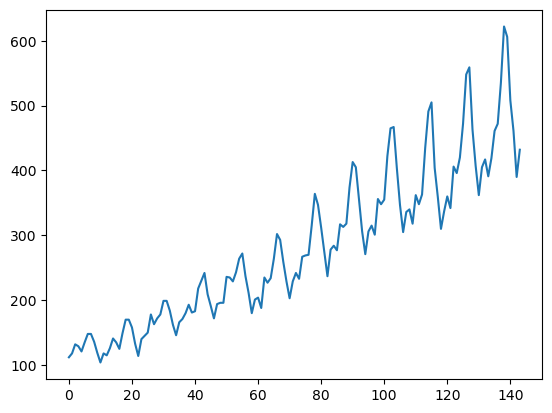

In [8]:
plt.plot(data)
plt.savefig("data.png")
plt.show() #tüm veri setini grafik üzerinde görelim...

## Ölçekleme İşlemi

In [9]:
scaler = MinMaxScaler() # veriyi ölçeklemek için kullanılır(0-1) 
data = scaler.fit_transform(data) #girdi verilerini düzenlemek ve ölçeklemek için kullanılır.

In [10]:
scaler

MinMaxScaler()

In [11]:
data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

## Eğitim ve Test Verilerine Bölme

In [12]:
len(data)

144

In [13]:
train = data[0:100,:] # eğitim için 1'den 100' e kadar olan veriler
test = data[100:,:]   # test için 100'den sona kadar olan veriler

## Eğitime Uygun Veri Setlerinin Oluşturulması

In [14]:
# bu fonksiyon veri setimi eğitim seti için kullanamayacağımdan 
#eğitim seti hazırlamama yardımcı olcaktır.
def get_data(data,steps):
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps),0]
        dataX.append(a)
        dataY.append(data[i+steps,0])
    return np.array(dataX), np.array(dataY)
#time series training için verilmesi gereken veriler burada oluşturulacak

In [15]:
steps = 2 # revize edilen adım sayısı 

### Eğitim ve Test Verileri Fonksiyon Üzerinden Oluşturuldu

In [16]:
X_train, y_train = get_data(train,steps) # eğitim verileri oluşturuldu...
X_test, y_test = get_data(test,steps)    # test verileri oluşturuldu...


In [17]:
# Bu kodlar veri setini 3D bir tensöre dönüştürmeye yönelik işlemi gerçekleştirir.
# zaman serisinde kullanılacak veri setlerinin verinin 3D bir tensör formatında olması gerekir
# model bunu istiyor
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [18]:
X_train

array([[[0.01544402, 0.02702703]],

       [[0.02702703, 0.05405405]],

       [[0.05405405, 0.04826255]],

       [[0.04826255, 0.03281853]],

       [[0.03281853, 0.05984556]],

       [[0.05984556, 0.08494208]],

       [[0.08494208, 0.08494208]],

       [[0.08494208, 0.06177606]],

       [[0.06177606, 0.02895753]],

       [[0.02895753, 0.        ]],

       [[0.        , 0.02702703]],

       [[0.02702703, 0.02123552]],

       [[0.02123552, 0.04247104]],

       [[0.04247104, 0.07142857]],

       [[0.07142857, 0.05984556]],

       [[0.05984556, 0.04054054]],

       [[0.04054054, 0.08687259]],

       [[0.08687259, 0.12741313]],

       [[0.12741313, 0.12741313]],

       [[0.12741313, 0.1042471 ]],

       [[0.1042471 , 0.05598456]],

       [[0.05598456, 0.01930502]],

       [[0.01930502, 0.06949807]],

       [[0.06949807, 0.07915058]],

       [[0.07915058, 0.08880309]],

       [[0.08880309, 0.14285714]],

       [[0.14285714, 0.11389961]],

       [[0.11389961, 0.13127

In [19]:
X_test

array([[[0.48455598, 0.61389961]],

       [[0.61389961, 0.6969112 ]],

       [[0.6969112 , 0.7007722 ]],

       [[0.7007722 , 0.57915058]],

       [[0.57915058, 0.46911197]],

       [[0.46911197, 0.38803089]],

       [[0.38803089, 0.44787645]],

       [[0.44787645, 0.45559846]],

       [[0.45559846, 0.41312741]],

       [[0.41312741, 0.4980695 ]],

       [[0.4980695 , 0.47104247]],

       [[0.47104247, 0.5       ]],

       [[0.5       , 0.63899614]],

       [[0.63899614, 0.74710425]],

       [[0.74710425, 0.77413127]],

       [[0.77413127, 0.57915058]],

       [[0.57915058, 0.49227799]],

       [[0.49227799, 0.3976834 ]],

       [[0.3976834 , 0.44980695]],

       [[0.44980695, 0.49420849]],

       [[0.49420849, 0.45945946]],

       [[0.45945946, 0.58301158]],

       [[0.58301158, 0.56370656]],

       [[0.56370656, 0.61003861]],

       [[0.61003861, 0.71042471]],

       [[0.71042471, 0.85714286]],

       [[0.85714286, 0.87837838]],

       [[0.87837838, 0.69305

## Model Oluşturma (LSTM)

In [20]:
model = Sequential()
model.add(LSTM(128, input_shape = (1, steps))) #ilk gizli katmanda (hidden layer) 128 tane hafıza hücrelerinden olsun...
model.add(Dense(64)) # 64 tane hafıza hücrelerinden (Memory Cell) oluşur...
model.add(Dense(1)) # çıkış katmanı 
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [21]:
model.summary() # oluşturulan modelin özetini (mimarisi,katman) sunar

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75,393
Trainable params: 75,393
Non-trainable params: 0
_________________________________________________________________


## Şimdi Modeli Eğitme Zamanı

In [22]:
model.fit(X_train, y_train, epochs=100, batch_size=1) # model eğitimi
# modelin gözden geçirilmesi
# modelin güncellenmesi

Epoch 1/100
97/97 [==============================] - 2s 2ms/step - loss: 0.0082
Epoch 2/100
97/97 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 3/100
97/97 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 4/100
97/97 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 5/100
97/97 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 6/100
97/97 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 7/100
97/97 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 8/100
97/97 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 9/100
97/97 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 10/100
97/97 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 11/100
97/97 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 12/100
97/97 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 13/100
97/97 [=================

 ## Tahmin Yapma

In [23]:
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 2ms/step


In [24]:
# tahmin sonuçlarını yeniden ölçeklendirmeliyiz. çünkü modelimiz bize ölçekli tahminler veriyor
# çizim için tahmin ve test verileri orijinal ölçeklerine dönüştürüldü
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [26]:
mse

1965.3801764207778

In [27]:
rmse #58 kişilik yanılma anlamına gelmektedir

44.33260850007337

In [28]:
mae

36.92488730826029

## Şimdi Tahmin Edilen ve Gerçek Verileri Çizdirelim

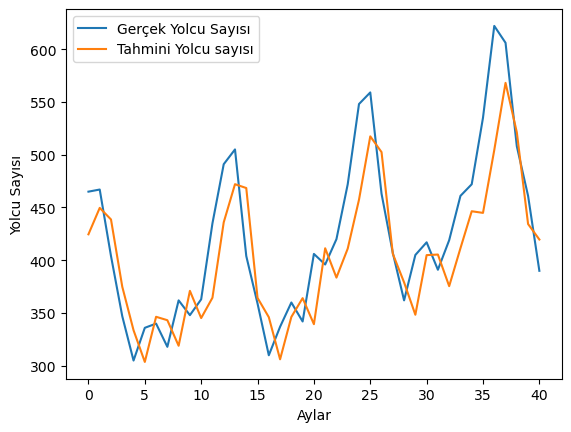

In [29]:
plt.plot(y_test, label = 'Gerçek Yolcu Sayısı')
plt.plot(y_pred, label = 'Tahmini Yolcu sayısı')
plt.xlabel('Aylar')
plt.ylabel('Yolcu Sayısı')
plt.legend()
plt.show()

In [30]:
real_values = y_test[:44].reshape(-1)
real_values

array([465., 467., 404., 347., 305., 336., 340., 318., 362., 348., 363.,
       435., 491., 505., 404., 359., 310., 337., 360., 342., 406., 396.,
       420., 472., 548., 559., 463., 407., 362., 405., 417., 391., 419.,
       461., 472., 535., 622., 606., 508., 461., 390.])

In [31]:
predicted_values = y_pred[:44].reshape(-1)
predicted_values

array([424.5964 , 449.61053, 438.65045, 374.94073, 333.7312 , 303.69095,
       346.43777, 343.21234, 319.01196, 371.01913, 345.23785, 364.49225,
       435.94043, 472.0589 , 468.42334, 364.35666, 346.06827, 306.18073,
       346.3083 , 364.11108, 339.45178, 411.36194, 383.56787, 411.03006,
       457.3526 , 517.37744, 502.4536 , 406.11255, 379.06122, 348.38232,
       404.86414, 405.41843, 375.46768, 411.40015, 446.42908, 444.88113,
       504.41708, 568.0702 , 521.2639 , 434.32178, 419.66443],
      dtype=float32)